https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
import numpy as np

In [22]:
mu1, sigma1 = 0, 0.1 # mean and standard deviation
mu2, sigma2 = 0.05, 0.1 # mean and standard deviation
mu3, sigma3 = -0.4, 0.1 # mean and standard deviation

In [43]:
s1 = np.random.normal(mu1, sigma1, 100000)
s2 = np.random.normal(mu1, sigma1, 100000)
s3 = np.random.normal(mu3, sigma3, 100000)

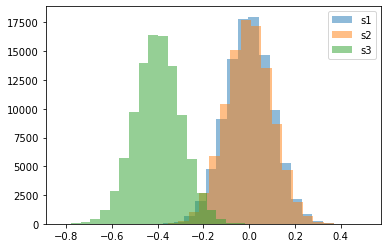

In [44]:
plt.hist(s1,bins=20, alpha=0.5, label="s1")
plt.hist(s2,bins=20, alpha=0.5, label="s2")
plt.hist(s3,bins=20, alpha=0.5, label="s3")
plt.legend();

In [45]:
from numpy import cov

In [46]:
cov(s1,s2)

array([[1.00123885e-02, 6.10955219e-05],
       [6.10955219e-05, 9.97591594e-03]])

In [47]:
cov(s1,s3)

array([[ 1.00123885e-02, -8.52308635e-05],
       [-8.52308635e-05,  1.00061662e-02]])

In [48]:
# plt.scatter(s1,s2, alpha=0.2)
# plt.scatter(s1,s3, alpha=0.2);

In [49]:
from scipy.stats import pearsonr

In [50]:
# calculate Pearson's correlation
v = pearsonr(s1, s2)
v

(0.006113137184493527, 0.053219247824380186)

In [51]:
# calculate Pearson's correlation
v = pearsonr(s2, s3)
v

(-0.004236608489929468, 0.18033557870073103)

In [54]:
import pandas as pd

In [82]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


In [61]:
df_X = pd.DataFrame(X, columns=[f"feat_{i}" for i in range(1,101)])

In [62]:
df_y = pd.DataFrame(y, columns=["target"])

In [63]:
df_y.head()

,target
0,-170.065769
1,-127.942190
2,-81.659359
3,-85.869516
4,-110.273169


In [103]:
def generate_regression_data(n_samples=1000, n_features=100, n_informative=10, random_state:int=None):
    X, y = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative, random_state=random_state)
    data = np.hstack((X,y.reshape(-1,1)))
    num_cols = [f"num_feat_{i}" for i in range(1,101)]
    target_col = ["target"]
    df = pd.DataFrame(data, columns=num_cols+target_col)
    return df

In [104]:
df = generate_regression_data(random_state=40)
cols = df.columns.values.tolist()
num_cols = cols[:-1]
target_col = cols[-1]

# Linear Regression F-test (f_regression)

To understand this test, we need a brief recap of linear regression. In general, the `Regression F-test` is used to test whether the regression model fits the data better than the model with no feature.

In the case of simple linear regression (regression with a single feature), this is equivalent to testing whether there is any significant linear relationship between that `feature` and the `target`. In particular, the `p-value` for the **F-test is equivalent to the p-value for the t-test on slope coefficient**.

And this is the idea behind the scikit-learn f_regression method:

>> It breaks your group of features into several simple linear regression models and returns the F-score of that model as the F-score for that feature.

You can check this quite easily using a few lines of codes.

- For more details, check [here](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)

In [94]:
fs = SelectKBest(score_func=f_regression, k=10)
fs.fit(df[num_cols], df[target_col])

SelectKBest(score_func=<function f_regression at 0x7f711d5771f0>)

In [99]:
feat_cols_index = fs.get_support(indices=True)
features_df_new = df[num_cols].iloc[:,feat_cols_index]

In [100]:
features_df_new.head()

,num_feat_15,num_feat_17,num_feat_23,num_feat_33,num_feat_54,num_feat_56,num_feat_69,num_feat_76,num_feat_77,num_feat_92
0,1.307710,-0.435413,1.068534,-1.522036,0.614324,-0.587480,0.200986,-0.881374,-0.139655,-0.284195
1,1.485108,0.908548,0.688033,-0.194384,-2.433331,0.380847,-1.651867,0.090233,-0.162364,0.132905
2,-0.685292,0.148837,0.339640,-0.146588,0.552402,0.414274,0.727286,-0.184041,-0.924947,0.686080
3,-1.736099,-1.381307,0.152017,1.632918,-1.300972,0.817929,0.957220,-1.011058,0.226855,-0.725132
4,-0.028753,0.773230,1.257774,-1.163159,-1.429979,-1.427078,0.158846,0.913014,0.327931,-1.584986
